<a href="https://colab.research.google.com/github/mahorii/ANALISE_COVID_SP/blob/main/ANALISE_COVID_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALISE DE DADOS DE CASOS DE COVID-19 NO ESTADO DE SÃO PAULO NO PERIODO DE 2020 - 2024.**

## **O OBJETIVO DESTA ANALISE É RESPONDER ALGUMAS PERGUNTAS REFERENTES PANDEMIA CAUSADA PELA COVID-19.**  

1 - QUAL ANO TEVE O MAIOR NUMERO DE CONTAMINAÇÃO PELA COVID-19?  

2 - QUAL GENERO FOI MAIS ATINGIDO PELA COVID-19?

3 - QUAL MUNICIPIO DO ESTADO DE SÃO PAULO FOI MAIS ATINGIDO PELA COVID-19?

4 - QUAL A IDADE DAS PESSOAS QUE FORAM CONTAMINADAS PELA COVID-19?

#ANALISE EXPLORATÓRIA DOS DADOS

In [ ]:
#IMPORTANDO AS LIBS
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import seaborn as sns

In [ ]:
covid = '/content/drive/My Drive/CovidSp.csv'

In [ ]:
#CARREGANDO CONJUNTO DE DADOS
df = pd.read_csv(covid, header = 0, delimiter=";", encoding="utf-8")

In [ ]:
df

,Asma,Cardiopatia,Data_Inicio_Sintomas,Diabetes,Diagnostico_Covid19,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Idade,Imunodepressao,Municipio,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
0,IGNORADO,IGNORADO,15/07/2022,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,69.0,IGNORADO,ASSIS,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,IGNORADO,IGNORADO,21/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,60.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,IGNORADO,IGNORADO,23/06/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,58.0,IGNORADO,ARARAQUARA,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,IGNORADO,IGNORADO,03/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,45.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,IGNORADO,IGNORADO,23/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,42.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770923,IGNORADO,IGNORADO,11/01/2022,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,1.0,IGNORADO,SÃO BERNARDO DO CAMPO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6770924,IGNORADO,IGNORADO,18/05/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,9.0,IGNORADO,ITAQUAQUECETUBA,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6770925,IGNORADO,IGNORADO,02/01/2023,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,0.0,IGNORADO,CAMPINAS,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6770926,NÃO,SIM,10/05/2020,SIM,CONFIRMADO,NÃO,NÃO,NÃO,NÃO,FEMININO,77.0,NÃO,SÃO PAULO,NÃO,1,IGNORADO,NÃO,NÃO,NÃO


In [ ]:
#OPTEI POR REMOVER AS COLUNAS QUE NÃO SERÃO UTEIS
df.drop(["Asma", "Cardiopatia", "Diabetes",
         "Doenca_Hematologica", "Doenca_Hepatica",
         "Doenca_Neurologica", "Doenca Renal",
         "Imunodepressao", "Obesidade",
         "Outros_Fatores_De_Risco", "Pneumopatia",
         "Puérpera", "Síndrome_De_Down"], axis=1, inplace=True)

In [ ]:
df

,Data_Inicio_Sintomas,Diagnostico_Covid19,Genero,Idade,Municipio,Obito
0,15/07/2022,CONFIRMADO,MASCULINO,69.0,ASSIS,0
1,21/02/2021,CONFIRMADO,FEMININO,60.0,SÃO PAULO,0
2,23/06/2021,CONFIRMADO,MASCULINO,58.0,ARARAQUARA,0
3,03/02/2021,CONFIRMADO,FEMININO,45.0,SÃO PAULO,0
4,23/02/2021,CONFIRMADO,FEMININO,42.0,SÃO PAULO,0
...,...,...,...,...,...,...
6770923,11/01/2022,CONFIRMADO,MASCULINO,1.0,SÃO BERNARDO DO CAMPO,0
6770924,18/05/2021,CONFIRMADO,MASCULINO,9.0,ITAQUAQUECETUBA,0
6770925,02/01/2023,CONFIRMADO,MASCULINO,0.0,CAMPINAS,0
6770926,10/05/2020,CONFIRMADO,FEMININO,77.0,SÃO PAULO,1


In [ ]:
#VERIFICANDO SE EXISTE VALORES NULOS
df.isna().sum()

Data_Inicio_Sintomas    244724
Diagnostico_Covid19          0
Genero                       1
Idade                   221457
Municipio                    0
Obito                        0
dtype: int64

In [ ]:
#VOU REMOVER ESSES VALORES, POIS O CONJUNTO DE DADOS É GRANDE E NÃO IRA INTERFERIR
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6519159 entries, 0 to 6770927
Data columns (total 6 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Data_Inicio_Sintomas  object 
 1   Diagnostico_Covid19   object 
 2   Genero                object 
 3   Idade                 float64
 4   Municipio             object 
 5   Obito                 int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 348.2+ MB


In [ ]:
#CONVERTENDO A VARIAVEL DATA DE OBJECT PARA DATETIME
df['Data_Inicio_Sintomas'] = pd.to_datetime(df['Data_Inicio_Sintomas'], dayfirst=True)
df

,Data_Inicio_Sintomas,Diagnostico_Covid19,Genero,Idade,Municipio,Obito
0,2022-07-15,CONFIRMADO,MASCULINO,69.0,ASSIS,0
1,2021-02-21,CONFIRMADO,FEMININO,60.0,SÃO PAULO,0
2,2021-06-23,CONFIRMADO,MASCULINO,58.0,ARARAQUARA,0
3,2021-02-03,CONFIRMADO,FEMININO,45.0,SÃO PAULO,0
4,2021-02-23,CONFIRMADO,FEMININO,42.0,SÃO PAULO,0
...,...,...,...,...,...,...
6770923,2022-01-11,CONFIRMADO,MASCULINO,1.0,SÃO BERNARDO DO CAMPO,0
6770924,2021-05-18,CONFIRMADO,MASCULINO,9.0,ITAQUAQUECETUBA,0
6770925,2023-01-02,CONFIRMADO,MASCULINO,0.0,CAMPINAS,0
6770926,2020-05-10,CONFIRMADO,FEMININO,77.0,SÃO PAULO,1


In [ ]:
#CRIO UMA COLUNA ANO E COLOCO NA 1 POSIÇAO DA TABELA
df.insert(0,'Ano', df['Data_Inicio_Sintomas'].dt.year)
df

,Ano,Data_Inicio_Sintomas,Diagnostico_Covid19,Genero,Idade,Municipio,Obito
0,2022,2022-07-15,CONFIRMADO,MASCULINO,69.0,ASSIS,0
1,2021,2021-02-21,CONFIRMADO,FEMININO,60.0,SÃO PAULO,0
2,2021,2021-06-23,CONFIRMADO,MASCULINO,58.0,ARARAQUARA,0
3,2021,2021-02-03,CONFIRMADO,FEMININO,45.0,SÃO PAULO,0
4,2021,2021-02-23,CONFIRMADO,FEMININO,42.0,SÃO PAULO,0
...,...,...,...,...,...,...,...
6770923,2022,2022-01-11,CONFIRMADO,MASCULINO,1.0,SÃO BERNARDO DO CAMPO,0
6770924,2021,2021-05-18,CONFIRMADO,MASCULINO,9.0,ITAQUAQUECETUBA,0
6770925,2023,2023-01-02,CONFIRMADO,MASCULINO,0.0,CAMPINAS,0
6770926,2020,2020-05-10,CONFIRMADO,FEMININO,77.0,SÃO PAULO,1


In [ ]:
#CONVERTO A COLUNA IDADE PARA TIPO INTEIRO
df['Idade'] = df['Idade'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6519159 entries, 0 to 6770927
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Ano                   int32         
 1   Data_Inicio_Sintomas  datetime64[ns]
 2   Diagnostico_Covid19   object        
 3   Genero                object        
 4   Idade                 int64         
 5   Municipio             object        
 6   Obito                 int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(3)
memory usage: 373.0+ MB


In [ ]:
df

,Ano,Data_Inicio_Sintomas,Diagnostico_Covid19,Genero,Idade,Municipio,Obito
0,2022,2022-07-15,CONFIRMADO,MASCULINO,69,ASSIS,0
1,2021,2021-02-21,CONFIRMADO,FEMININO,60,SÃO PAULO,0
2,2021,2021-06-23,CONFIRMADO,MASCULINO,58,ARARAQUARA,0
3,2021,2021-02-03,CONFIRMADO,FEMININO,45,SÃO PAULO,0
4,2021,2021-02-23,CONFIRMADO,FEMININO,42,SÃO PAULO,0
...,...,...,...,...,...,...,...
6770923,2022,2022-01-11,CONFIRMADO,MASCULINO,1,SÃO BERNARDO DO CAMPO,0
6770924,2021,2021-05-18,CONFIRMADO,MASCULINO,9,ITAQUAQUECETUBA,0
6770925,2023,2023-01-02,CONFIRMADO,MASCULINO,0,CAMPINAS,0
6770926,2020,2020-05-10,CONFIRMADO,FEMININO,77,SÃO PAULO,1


In [ ]:
df['Diagnostico_Covid19'].unique()

array(['CONFIRMADO'], dtype=object)

In [ ]:
#REMOVENDO A COLUNA DATAS_SINTOMA E Data_Inicio_Sintomas DO MEU DF
df.drop(['Data_Inicio_Sintomas'], inplace=True, axis=1)

In [ ]:
df

,Ano,Diagnostico_Covid19,Genero,Idade,Municipio,Obito
0,2022,CONFIRMADO,MASCULINO,69,ASSIS,0
1,2021,CONFIRMADO,FEMININO,60,SÃO PAULO,0
2,2021,CONFIRMADO,MASCULINO,58,ARARAQUARA,0
3,2021,CONFIRMADO,FEMININO,45,SÃO PAULO,0
4,2021,CONFIRMADO,FEMININO,42,SÃO PAULO,0
...,...,...,...,...,...,...
6770923,2022,CONFIRMADO,MASCULINO,1,SÃO BERNARDO DO CAMPO,0
6770924,2021,CONFIRMADO,MASCULINO,9,ITAQUAQUECETUBA,0
6770925,2023,CONFIRMADO,MASCULINO,0,CAMPINAS,0
6770926,2020,CONFIRMADO,FEMININO,77,SÃO PAULO,1


# 1 - ANALISE DO NUMERO DE CASOS DE COVID 19 POR ANO

In [ ]:
#CRIADO UM NOVO DATAFRAME PARA FACILITAR A VISUALIZACAO DOS DADOS NO GRAFICO.
df_anos = pd.DataFrame(df['Ano'].value_counts().reset_index())
df_anos = df_anos.rename(columns={'count': 'Total'}).sort_values(by='Ano')
df_anos['Ano'] = df_anos['Ano'].astype(str)
df_anos

,Ano,Total
2,2020,1626789
0,2021,2848164
1,2022,1827360
3,2023,214900
4,2024,1946


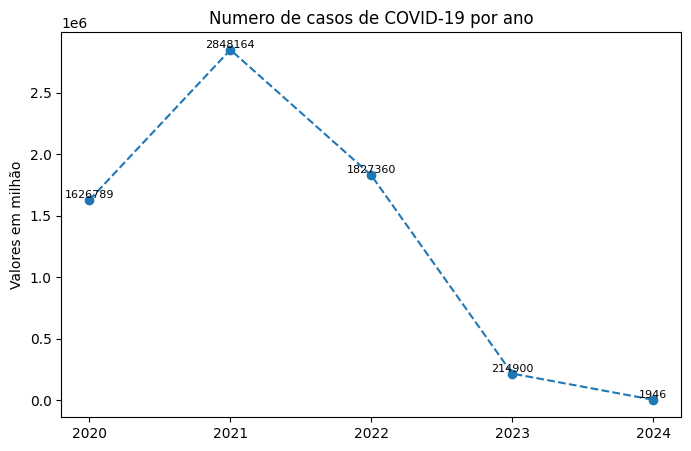

In [ ]:
anos = df_anos['Ano']
valores = df_anos['Total']

#CASOS DE COVID POR ANO
plt.figure(figsize=(8, 5))
plt.plot(anos, valores,linestyle='--' ,marker='o')

# LOOP PARA INSERIR ROTULOS COM VALORES
for ano, valor in zip(anos, valores):
    plt.text(ano, valor, str(valor), ha='center', va='bottom', fontsize=8)

#plt.xlabel('Ano')
plt.ylabel('Valores em milhão')
plt.title('Numero de casos de COVID-19 por ano')



# Exibindo o gráfico
plt.show()

In [ ]:
#DEF PARA INSERIR VALORES NOS ROTULOS
def inserir_valores(x):
  for bar in x:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

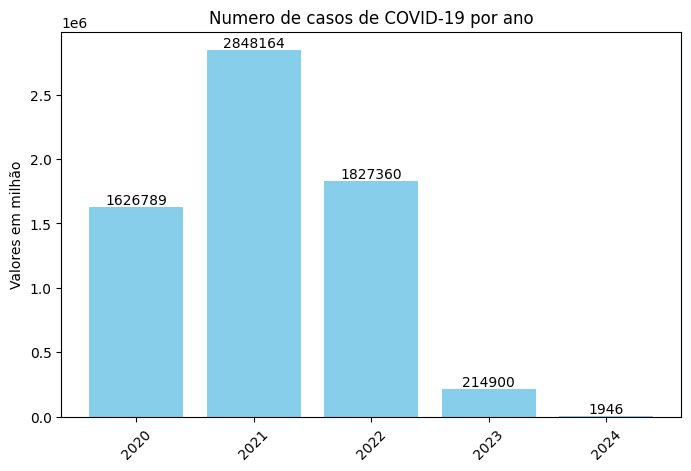

In [ ]:
#CASOS DE COVID POR ANO
plt.figure(figsize=(8, 5))
bars = plt.bar(anos, valores, color='skyblue')

#FUNÇÃO PARA INSERIR OS ROTULOS NO GRAFICO
inserir_valores(bars)

#plt.xlabel('Ano')
plt.ylabel('Valores em milhão')
plt.title('Numero de casos de COVID-19 por ano')
plt.xticks(rotation=45)  # Rotaciona os marcadores do eixo x para melhor legibilidade


# Exibindo o gráfico
plt.show()


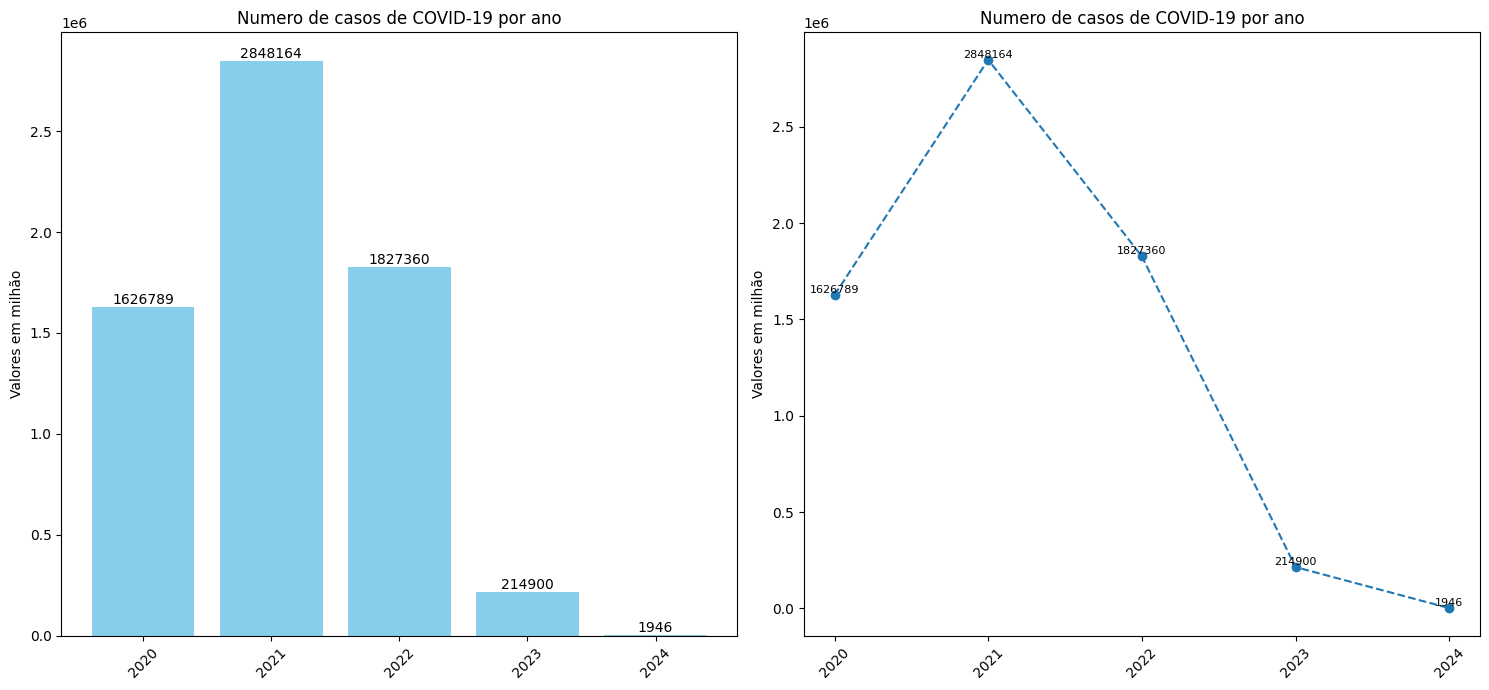

In [ ]:
anos = df_anos['Ano']
valores = df_anos['Total']

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

#PRIEIRO GRAFICO

bars = axs[0].bar(anos, valores, color='skyblue')

#LOOP PARA EXTRAIR OS VALORES E COLOCAR NO TOPO DO GRAFICO DE BARRA
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

#plt.xlabel('Ano')
axs[0].set_ylabel('Valores em milhão')
axs[0].set_title('Numero de casos de COVID-19 por ano')


#SEGUNDO GRAFICO



#CASOS DE COVID POR ANO
axs[1].plot(anos, valores,linestyle='--' ,marker='o')

for ano, valor in zip(anos, valores):
    plt.text(ano, valor, str(valor), ha='center', va='bottom', fontsize=8)

#plt.xlabel('Ano')
axs[1].set_ylabel('Valores em milhão')
axs[1].set_title('Numero de casos de COVID-19 por ano')


# Rotacionando os eixos x em 45 graus para ambos os gráficos
for ax in axs:
    ax.set_xticks(anos)
    ax.set_xticklabels(anos, rotation=45)

plt.tight_layout()

# Exibindo o gráfico
plt.show()


#2 - ANALISE DE NUMERO DE CASOS COVID-19 POR GENERO

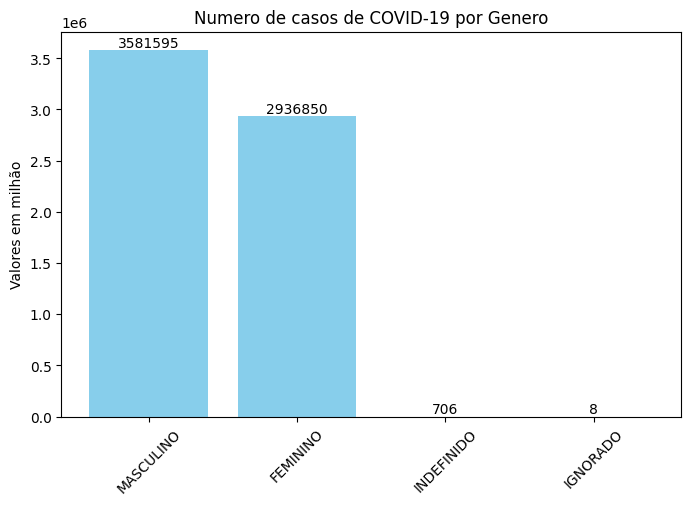

In [ ]:
#CASOS DE COVID POR GENERO
plt.figure(figsize=(8, 5))
bars = plt.bar(df['Genero'].unique(), df['Genero'].value_counts(), color='skyblue')

#FUNÇÃO PARA INSERIR OS ROTULOS NO GRAFICO
inserir_valores(bars)


#plt.xlabel('Ano')
plt.ylabel('Valores em milhão')
plt.title('Numero de casos de COVID-19 por Genero')
plt.xticks(rotation=45)  # Rotaciona os marcadores do eixo x para melhor legibilidade


# Exibindo o gráfico
plt.show()

In [ ]:
#PERCEBO QUE A COLUNA GENERO TEM SEXO INDEFINIDO E IGNORADO ENTÃO DECIDO TRATAR ELES REMOVENDO-OS
df = df.drop(df.query("Genero == 'INDEFINIDO' or Genero == 'IGNORADO'").index)

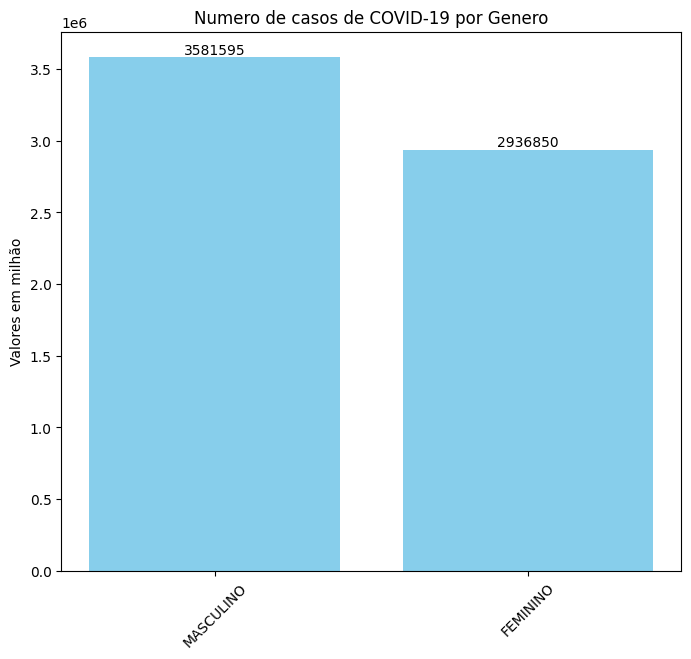

In [ ]:
#CASOS DE COVID POR GENERO
plt.figure(figsize=(8, 7))
bars = plt.bar(df['Genero'].unique(), df['Genero'].value_counts(), color='skyblue')

#FUNÇÃO PARA INSERIR OS ROTULOS NO GRAFICO
inserir_valores(bars)


#plt.xlabel('Ano')
plt.ylabel('Valores em milhão')
plt.title('Numero de casos de COVID-19 por Genero')
plt.xticks(rotation=45)  # Rotaciona os marcadores do eixo x para melhor legibilidade


# Exibindo o gráfico
plt.show()

#3 - ANALISE DO NUMERO DE CASOS DE COVID-19 POR MUNICIPIO

In [ ]:
df_municipios = pd.DataFrame(df['Municipio'].value_counts().head(5).reset_index())
df_municipios = df_municipios.rename(columns={'count':'Total'})
df_municipios

,Municipio,Total
0,SÃO PAULO,1169394
1,CAMPINAS,217075
2,SÃO JOSÉ DO RIO PRETO,159233
3,SÃO JOSÉ DOS CAMPOS,134164
4,SOROCABA,113698


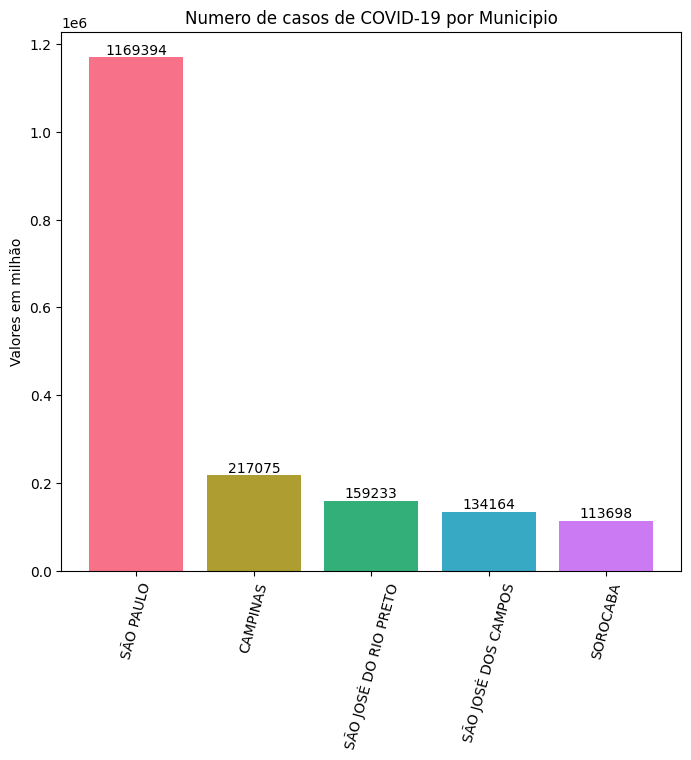

In [ ]:
nomes_municipios =  df_municipios['Municipio']
valores = df_municipios['Total']
#CASOS DE COVID POR MUNICIPIO
custom_palette = sns.color_palette("husl", 5)
plt.figure(figsize=(8, 7))
bars = plt.bar( nomes_municipios, valores, color=custom_palette)


#FUNÇÃO PARA INSERIR OS ROTULOS NO GRAFICO
inserir_valores(bars)


#plt.xlabel('Ano')
plt.ylabel('Valores em milhão')
plt.title('Numero de casos de COVID-19 por Municipio')
plt.xticks(rotation=75)  # Rotaciona os marcadores do eixo x para melhor legibilidade


# Exibindo o gráfico
plt.show()

# 4 - ANALISE DO NUMERO DE CASOS DE COVID-19 POR FAIXA ETARIA

In [ ]:
# Definindo os limites das faixas etárias
limites = [-1, 18, 30, 50, float('inf')]  # Faixas: <18, 18-30, 30-50, >50
categorias = ['<18', '18-30', '30-50', '>50']

# Criando a coluna de faixas etárias
df['Faixa Etária'] = pd.cut(df['Idade'], bins=limites, labels=categorias)

df


,Ano,Diagnostico_Covid19,Genero,Idade,Municipio,Obito,Faixa Etária
0,2022,CONFIRMADO,MASCULINO,69,ASSIS,0,>50
1,2021,CONFIRMADO,FEMININO,60,SÃO PAULO,0,>50
2,2021,CONFIRMADO,MASCULINO,58,ARARAQUARA,0,>50
3,2021,CONFIRMADO,FEMININO,45,SÃO PAULO,0,30-50
4,2021,CONFIRMADO,FEMININO,42,SÃO PAULO,0,30-50
...,...,...,...,...,...,...,...
6770923,2022,CONFIRMADO,MASCULINO,1,SÃO BERNARDO DO CAMPO,0,<18
6770924,2021,CONFIRMADO,MASCULINO,9,ITAQUAQUECETUBA,0,<18
6770925,2023,CONFIRMADO,MASCULINO,0,CAMPINAS,0,<18
6770926,2020,CONFIRMADO,FEMININO,77,SÃO PAULO,1,>50


In [ ]:
df_contagem = pd.DataFrame(df['Faixa Etária'].value_counts().reset_index())
df_contagem = df_contagem.sort_values(by= 'Faixa Etária')
df_contagem.columns = ['Faixa Etária', 'Contagem']
df_contagem

,Faixa Etária,Contagem
3,<18,616908
2,18-30,1349493
0,30-50,2614862
1,>50,1937182


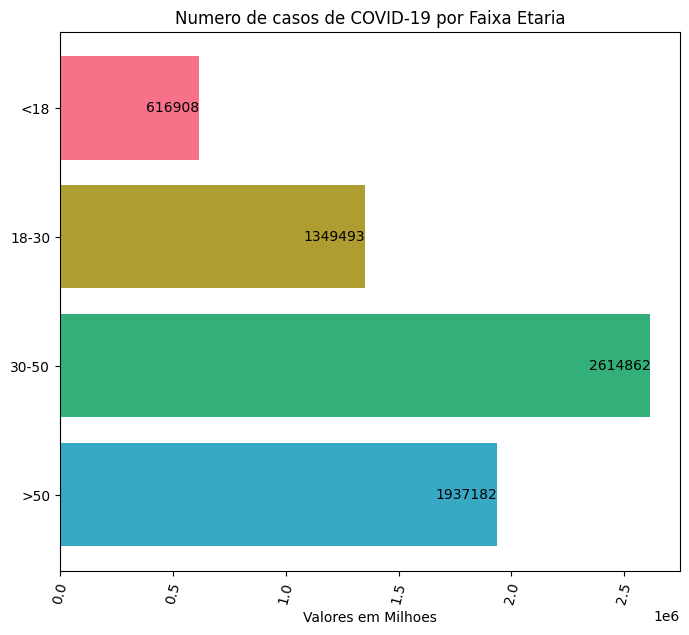

In [ ]:
faixa = df_contagem['Faixa Etária']
valores = df_contagem['Contagem']

#CASOS DE COVID POR FAIXA ETARIA
custom_palette = sns.color_palette("husl", 5)
plt.figure(figsize=(8, 7))
bars = plt.barh( faixa, valores, color=custom_palette)


#LOOP PARA EXTRAIR OS VALORES E COLOCAR NO TOPO DO GRAFICO DE BARRA
for i, valor in enumerate(valores):
    plt.text(valor, i, str(valor), ha='right', va='center')

plt.xlabel('Valores em Milhoes')
#plt.ylabel('Faixa Etária')
plt.title('Numero de casos de COVID-19 por Faixa Etaria')
plt.xticks(rotation=75)  # Rotaciona os marcadores do eixo x para melhor legibilidade

# Inverter os rótulos do eixo y para horizontal
plt.gca().invert_yaxis()

# Exibindo o gráfico
plt.show()

# **Considerações finais.**

1 - Como pudermos ver na analise acima, o ano de 2021 foi o ápice nos casos de covid-19 somando quase 3 milhões de casos.

2 - O Genero masculino foi o mais afetado pela Covid-19

3 - O municipio de São Paulo foi o mais atingido pela pandemia do Covid-19.

4 - Pessoas entre 30 e 50 anos foram onde tivemos mais casos, com 2,6 milhões de pessoas contaminadas pelo Covid-19.

# OPORTUNIDADE DE MELHORIAS.

Realizar uma analise com a porcentagem de casos por ano com base no faixa etaria.

Analisar por genero e faixa etaria para obter quais foram os numeros de contaminados pela Covid-19.


O dados foram extraidos do SEADE atraves do link: "https://www.saopaulo.sp.gov.br/wp-content/uploads/2024/01/20240120_Casos_e_obitos_ESP.zip"